2. Perform the following operations using R/Python on the data sets:
a) Compute and display summary statistics for each feature available in the dataset. (e.g.
minimum value, maximum value, mean, range, standard deviation, variance and
percentiles
b) Illustrate the feature distributions using histogram.
c) Data cleaning, Data integration, Data transformation, Data model building (e.g.
Classification)

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [62]:
# Load dataset
df = pd.read_csv("admission.csv")

In [63]:
# 🟢 Step 1: Data Cleaning (Fix Column Names)
df.columns = df.columns.str.strip()
df.dropna(inplace=True)


In [64]:
summary_stats = df.describe().T  # Transpose for better readability
summary_stats['range'] = summary_stats['max'] - summary_stats['min']  # Compute Range
summary_stats['variance'] = df.var()  # Compute Variance
summary_stats['percentile_25'] = df.quantile(0.25)
summary_stats['percentile_50'] = df.quantile(0.50)  # Median
summary_stats['percentile_75'] = df.quantile(0.75)
print("\n🔹 Summary Statistics:\n", summary_stats)



🔹 Summary Statistics:
                    count       mean         std     min       25%     50%  \
Serial No.         500.0  250.50000  144.481833    1.00  125.7500  250.50   
GRE Score          500.0  316.47200   11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200    6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400    1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400    0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48400    0.925450    1.00    3.0000    3.50   
CGPA               500.0    8.57644    0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000    0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72174    0.141140    0.34    0.6300    0.72   

                      75%     max   range      variance  percentile_25  \
Serial No.         375.25  500.00  499.00  20875.000000       125.7500   
GRE Score          325.00  340.00   50.00    127.580377  

<Figure size 1200x800 with 0 Axes>

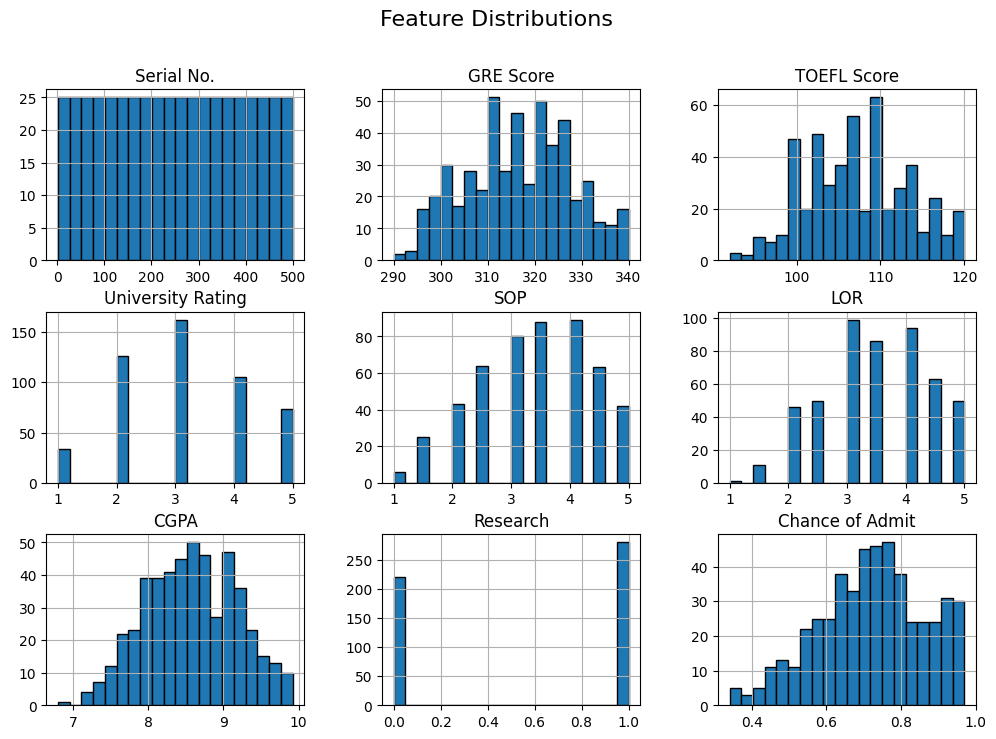

In [65]:
# 🟢 Step 3: Illustrate Feature Distributions (Histogram)
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8), edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [67]:
# 🟢 Step 4: Data Transformation - Convert 'Chance of Admit' into Binary Classification
df['Admit'] = np.where(df['Chance of Admit'] >= 0.75, 1, 0)


In [68]:
# 🟢 Step 5: Data Integration (Ensure Data is in Expected Format)
df = df.drop_duplicates()


In [69]:
# Selecting features (excluding Serial No. and Chance of Admit)
X = df.drop(columns=['Serial No.', 'Chance of Admit'])
y = df['Admit']



In [70]:
# 🟢 Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# 🟢 Step 6: Train the Classification Model (Random Forest)
model = RandomForestClassifier(n_estimators=30, max_depth=3, 
                               min_samples_split=5, min_samples_leaf=3, 
                               random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=30, random_state=42)

In [55]:
# 🟢 Step 7: Make Predictions
y_pred = model.predict(X_test)


In [56]:
# 🟢 Step 8: Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [57]:
# Calculate Performance Metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100


In [59]:
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Classification Report:\n", report)
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")




🔹 Confusion Matrix:
 [[64  0]
 [ 0 36]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%


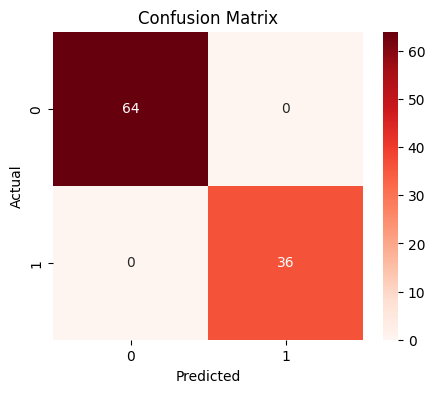

In [42]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')  
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

